In [ ]:
import matplotlib.pyplot as plt    
from sklearn.model_selection import train_test_split
import json
import os
import pandas as pd
import numpy as np

In [ ]:
path = '/content/'

### Read in article data from json files
items = []
names = ['2015_'+ str(i) for i in range(1,13)] +  ['2016_'+ str(i) for i in range(1,13)]

for filename in names:
  f = open(path + filename, 'rb')
  data = json.load(f)
  for item in data["content"]["itmes"]["item"]:
    item["filename"] = filename
    items.append(item)
  f.close()

In [ ]:
# Create Data Frame
df_all = pd.DataFrame(items)
display(df_all.shape)
display(df_all.head(50))

(171058, 11)

,id,title,lead,text,oberzeile,channel_url,catname,main_catname,updDate,tags_all,filename
0,22771449,Dinguerie cartoonesque à tous les étages,"Avec «The Grand Budapest Hotel», le réalisateu...","Il était une fois, au pays imaginaire de Zubro...",«20 minutes movie»,/ro/sortir/cinema,Cinema,Sortir,"Mon, 29 Dec 2014 14:19:23 GMT",[],2015_1
1,22565265,Der Bundesrat beim Abendmahl?,"Statt schwere Bundesordner, Espresso-Tässchen ...","Entspannt, gutgelaunt und einträchtig: So zeig...",Bundesratsfoto 2015,/schweiz/news,News,Schweiz,"Thu, 1 Jan 2015 04:24:25 GMT","[{'id': 5339, 'name': 'Simonetta Sommaruga'}, ...",2015_1
2,25171748,Rakete trifft Hochzeits-Feier – 28 Tote,Gäste einer Hochzeit warten vor einem Haus auf...,Ein Raketenangriff auf eine Hochzeitsfeier in ...,Afghanistan,/ausland/news,News,Ausland,"Thu, 1 Jan 2015 15:23:02 GMT","[{'id': 1374, 'name': 'Attentat'}, {'id': 91, ...",2015_1
3,31871620,Kim ist offen für Gespräche mit Südkorea,Nordkoreas Führer Kim Jong Un hat sich in sein...,Nordkoreas Machthaber Kim Jong Un hat sich zu ...,Innerkoreanischen Beziehungen,/ausland/news,News,Ausland,"Thu, 1 Jan 2015 04:10:38 GMT","[{'id': 91, 'name': 'News'}, {'id': 949, 'name...",2015_1
4,29358818,Ölpreis beendet Jahr auf tiefstem Stand seit 2009,Zu Handelsschluss am Mittwoch lag die US-Sorte...,Der Ölpreis hat das Jahr auf dem tiefsten Stan...,Preiseinbruch,/finance/news,News,Finance,"Thu, 1 Jan 2015 04:41:10 GMT","[{'id': 4707, 'name': 'Rohöl'}, {'id': 91, 'na...",2015_1
5,19773258,«Es ist ein Rennen gegen die Zeit und das Wetter»,Bei der Suche nach QZ8501-Opfern wollen die Ei...,Bei deutlich verbesserten Wetterbedingungen ha...,AirAsia-Absturz,/ausland/news,News,Ausland,"Thu, 1 Jan 2015 05:05:23 GMT","[{'id': 7621, 'name': 'Luftfahrt'}, {'id': 91,...",2015_1
6,26091296,So rutschten die 20-Minuten-Leser ins 2015,"Mit Feuerwerk, beim Schnorcheln auf den Maledi...","Bei Glockengeläute, Glühwein und Champagner ha...",Leser-Bilder,/schweiz/news,News,Schweiz,"Thu, 1 Jan 2015 05:50:56 GMT","[{'id': 24774, 'name': 'Leser-Aufruf'}, {'id':...",2015_1
7,11702134,Lindsay Lohan leidet an Tropen-Krankheit,US-Schauspielerin Lindsay Lohan liegt flach. G...,US-Schauspielerin Lindsay Lohan hat sich in de...,Chikungunya-Fieber,/people/international,International,People,"Thu, 1 Jan 2015 06:23:36 GMT","[{'id': 24874, 'name': 'Lindsay Lohan'}, {'id'...",2015_1
8,12087261,Mann erschiesst drei Menschen,Ein Mann hat im Norden Frankreichs mit einer J...,In Nordfrankreich hat ein Mann in der Silveste...,Nordfrankreich,/panorama/news,News,Panorama,"Thu, 1 Jan 2015 06:39:43 GMT","[{'id': 24778, 'name': 'Schiesserei'}, {'id': ...",2015_1
9,11307925,Salade d'endives avec baguette aux chanterelles,Plat principal pour 4 personnes,Ingrédients\n\n<!--[articleElementIndex:0]--><...,,/ro/life/dossier/cuisine,News,Life,"Tue, 9 Dec 2014 13:10:26 GMT",[],2015_1


In [ ]:
pd.DataFrame(df_all).to_csv('/content/df_all.csv',index = False)

In [ ]:
print('Number of data: ' + str(len(df_all)))

Number of data: 171058


In [ ]:
print(df_all.columns)

Index(['id', 'title', 'lead', 'text', 'oberzeile', 'channel_url', 'catname',
       'main_catname', 'updDate', 'tags_all', 'filename'],
      dtype='object')


In [ ]:
df_all['id'].dropna().is_unique

False

In [ ]:
df_all.drop(['id'], axis=1, inplace=True)

In [ ]:
df_all['oberzeile']

0                    «20 minutes movie»
1                   Bundesratsfoto 2015
2                           Afghanistan
3         Innerkoreanischen Beziehungen
4                         Preiseinbruch
                      ...              
171053                       Etats-Unis
171054        Trashtalk am Spengler-Cup
171055            Silvester in New York
171056                       Etats-Unis
171057                              RDC
Name: oberzeile, Length: 171058, dtype: object

In [ ]:
df_all.drop(['oberzeile'], axis=1, inplace=True)

In [ ]:
df_all.drop(['channel_url'], axis=1, inplace=True)

In [ ]:
df_all['catname']

0            Cinema
1              News
2              News
3              News
4              News
            ...    
171053         News
171054    Eishockey
171055         News
171056        Monde
171057        Monde
Name: catname, Length: 171058, dtype: object

In [ ]:
df_all.drop(['catname'], axis=1, inplace=True)

In [ ]:
df_all['main_catname']

0           Sortir
1          Schweiz
2          Ausland
3          Ausland
4          Finance
            ...   
171053    Economie
171054       Sport
171055    Panorama
171056        News
171057        News
Name: main_catname, Length: 171058, dtype: object

In [ ]:
df_all.drop(['main_catname'], axis=1, inplace=True)

In [ ]:
df_all['updDate']

0         Mon, 29 Dec 2014 14:19:23 GMT
1          Thu, 1 Jan 2015 04:24:25 GMT
2          Thu, 1 Jan 2015 15:23:02 GMT
3          Thu, 1 Jan 2015 04:10:38 GMT
4          Thu, 1 Jan 2015 04:41:10 GMT
                      ...              
171053    Fri, 30 Dec 2016 22:07:29 GMT
171054    Sat, 31 Dec 2016 11:38:50 GMT
171055    Fri, 30 Dec 2016 22:11:08 GMT
171056    Fri, 30 Dec 2016 22:32:47 GMT
171057    Fri, 30 Dec 2016 22:51:25 GMT
Name: updDate, Length: 171058, dtype: object

In [ ]:
df_all.drop(['updDate'], axis=1, inplace=True)

In [ ]:
df_all['tags_all']

0                                                        []
1         [{'id': 5339, 'name': 'Simonetta Sommaruga'}, ...
2         [{'id': 1374, 'name': 'Attentat'}, {'id': 91, ...
3         [{'id': 91, 'name': 'News'}, {'id': 949, 'name...
4         [{'id': 4707, 'name': 'Rohöl'}, {'id': 91, 'na...
                                ...                        
171053    [{'id': 9138, 'name': 'Etats-Unis'}, {'id': 88...
171054    [{'id': 873, 'name': 'Davos'}, {'id': 1768, 'n...
171055    [{'id': 1025, 'name': 'USA'}, {'id': 91, 'name...
171056    [{'id': 9138, 'name': 'Etats-Unis'}, {'id': 88...
171057    [{'id': 10087, 'name': 'Aarau'}, {'id': 8870, ...
Name: tags_all, Length: 171058, dtype: object

In [ ]:
pd.DataFrame(df_all).to_csv('/content/df_all.csv',index = False)

In [ ]:
df_all

,title,lead,text,tags_all,filename
0,Dinguerie cartoonesque à tous les étages,"Avec «The Grand Budapest Hotel», le réalisateu...","Il était une fois, au pays imaginaire de Zubro...",[],2015_1
1,Der Bundesrat beim Abendmahl?,"Statt schwere Bundesordner, Espresso-Tässchen ...","Entspannt, gutgelaunt und einträchtig: So zeig...","[{'id': 5339, 'name': 'Simonetta Sommaruga'}, ...",2015_1
2,Rakete trifft Hochzeits-Feier – 28 Tote,Gäste einer Hochzeit warten vor einem Haus auf...,Ein Raketenangriff auf eine Hochzeitsfeier in ...,"[{'id': 1374, 'name': 'Attentat'}, {'id': 91, ...",2015_1
3,Kim ist offen für Gespräche mit Südkorea,Nordkoreas Führer Kim Jong Un hat sich in sein...,Nordkoreas Machthaber Kim Jong Un hat sich zu ...,"[{'id': 91, 'name': 'News'}, {'id': 949, 'name...",2015_1
4,Ölpreis beendet Jahr auf tiefstem Stand seit 2009,Zu Handelsschluss am Mittwoch lag die US-Sorte...,Der Ölpreis hat das Jahr auf dem tiefsten Stan...,"[{'id': 4707, 'name': 'Rohöl'}, {'id': 91, 'na...",2015_1
...,...,...,...,...,...
171053,Wall Street achève un bon cru 2016 sur un peti...,la Bourse de New York a été victime de quelque...,"Wall Street, manquant de conviction vendredi, ...","[{'id': 9138, 'name': 'Etats-Unis'}, {'id': 88...",2016_12
171054,"«Das ganze Team hasst dich, frag mal nach»",4:0 für die Tessiner: Der Schweizer Halbfinal ...,Es war ein hitziges Mitteldrittel zwischen Dav...,"[{'id': 873, 'name': 'Davos'}, {'id': 1768, 'n...",2016_12
171055,Müll-Laster sollen Times Square sichern,65 Müllfahrzeuge sollen am Silvesterabend als ...,"Wie die New Yorker Polizei mitteilt, soll der ...","[{'id': 1025, 'name': 'USA'}, {'id': 91, 'name...",2016_12
171056,Justice: un Kennedy risque de retourner en prison,Un neveu de Robert Kennedy avait été condamné ...,"Un membre du clan Kennedy, condamné en 2002 po...","[{'id': 9138, 'name': 'Etats-Unis'}, {'id': 88...",2016_12


In [ ]:
df_all['text'][5]

'Bei deutlich verbesserten Wetterbedingungen haben die Bergungskräfte die Suche nach den Opfern des vor Indonesien abgestürzten Air-Asia-Fluges QZ8501 vorangetrieben. Bislang konnten nur sieben Leichen aus der Javasee gezogen werden, darunter eine Flugbegleiterin. An Bord der Maschine waren 162 Menschen gewesen, als sie am Sonntag etwa auf halber Strecke zwischen Indonesien und Singapur verschollen war.\n\n<!--[articleElementIndex:0]-->Eine Zeitspanne mit klarerer Sicht sollte am Donnerstag ausgenutzt werden, um «mit voller Kraft zu kämpfen» und weitere Verunglückte zu finden, sagte der Luftwaffenkommandeur Agus Dwi Putranto. Die Einsatzkräfte wollen demnach auch weiterhin nach Wrackteilen suchen, die möglicherweise Antworten auf die Frage nach der Unglücksursache geben könnten. Vier Flugzeuge seien kurz nach Sonnenaufgang ins Suchgebiet geschickt worden, sagte der Kommandeur.\n\n<!--[articleElementIndex:1]--><b>Tote wurden in eine Stadt auf Borneo gebracht</b>\n\nVier der bislang gefu

In [ ]:
df_all['tags_all'][5]

[{'id': 7621, 'name': 'Luftfahrt'},
 {'id': 91, 'name': 'News'},
 {'id': 169, 'name': 'Unfälle/Unglücke'},
 {'id': 936, 'name': 'Indonesien'},
 {'id': 16917, 'name': 'Air Asia'}]

Remove rare tags

In [ ]:
def unique_tags_df(df):
  unique_tags = dict()

  for alle_tags in df['tags_all']:
    for tag in alle_tags:
      if tag['name'] in unique_tags.keys():
        unique_tags[tag['name']] += 1
      else:
        unique_tags[tag['name']] = 1
  
  df_tags = pd.DataFrame({'tag': [tag for tag in unique_tags.keys()], 'freq': [unique_tags[tag] for tag in unique_tags.keys()]})

  return df_tags

In [ ]:
df_tags = unique_tags_df(df_all)
df_tags.sort_values('freq',  ascending=False)

,tag,freq
2,News,93473
3663,Suisse,16421
3670,Monde,15723
20,Schweiz,13069
50,Sport,11005
...,...,...
6005,Chavannes-près-Renens,1
6003,Nathalie Kosciusko-Morizet,1
6000,Andermatt Resort,1
5998,Qoqa.ch,1


Text(0.5, 1.0, 'Number of non rare tags depending on rare quantity')

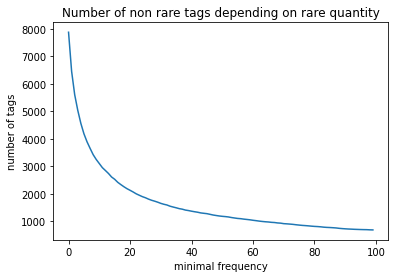

In [ ]:
num_tags_left = []
for i in range(0,100):
  cond = df_tags['freq'] > i
  num_tags_left.append(sum(cond))
  
plt.plot(num_tags_left)
plt.xlabel('minimal frequency')
plt.ylabel('number of tags')
plt.title('Number of non rare tags depending on rare quantity')  

In [ ]:
cond = df_tags['freq'] > 40
print(f"There are {sum(cond)} words left in dictionary after removing rare words.")
df_tags = df_tags[cond]

There are 1363 words left in dictionary after removing rare words.


In [ ]:
pd.DataFrame(df_tags).to_csv('/content/df_tags.csv',index = False)

Split data into train, test and validation data set

In [ ]:
def convert_to_list(df, vocab):
  X = dict()
  empty = 0
  vocab = set(vocab['tag'])

  for _, row in df.iterrows():
    tags = []
    for tag in row['tags_all']:
      if tag['name'] in vocab:
        tags = tags + [tag['name']]
      else:
        tags = tags + ['[UNK]']
    X[row['text']] = tags
    if len(tags) == 0:
      empty += 1

  print('Note: There is ' + str(empty) + ' empty columns')
  data = pd.DataFrame({'text': [text for text in X.keys()], 'tags': [X[text] for text in X.keys()]})

  return data

In [ ]:
data = convert_to_list(df_all, df_tags)

Note: There is 39797 empty columns


In [ ]:
data

,text,tags
0,"Il était une fois, au pays imaginaire de Zubro...",[]
1,"Entspannt, gutgelaunt und einträchtig: So zeig...","[Simonetta Sommaruga, Fotografie, News, Stadt ..."
2,Ein Raketenangriff auf eine Hochzeitsfeier in ...,"[Attentat, News, Krieg/Konflikt, Afghanistan, ..."
3,Nordkoreas Machthaber Kim Jong Un hat sich zu ...,"[News, Nordkorea, Politik]"
4,Der Ölpreis hat das Jahr auf dem tiefsten Stan...,"[News, Handel, USA, Wirtschaft]"
...,...,...
161324,"Wall Street, manquant de conviction vendredi, ...","[Etats-Unis, News, Economie, Bourse]"
161325,Es war ein hitziges Mitteldrittel zwischen Dav...,"[Davos, Reaktion, Sport, Eishockey, HC Davos]"
161326,"Wie die New Yorker Polizei mitteilt, soll der ...","[USA, News, Panorama, Sicherheitspolitik, Isla..."
161327,"Un membre du clan Kennedy, condamné en 2002 po...","[Etats-Unis, News, Monde]"


In [ ]:
for key in list(set(df_tags['tag'])):
    print(key)
#    ind = [key in sublist for sublist in data['tags'].values]

Betrug
Canton du Tessin
Gerichtsberichterstattung
Winterthur
Stan Wawrinka
Zuger Sex-Skandal
Guy Parmelin
Youngtimer
Société
Geheimdienste
Zlatan Ibrahimovic
20 Minuten
Eishockey-WM 2016
IT-Sicherheit
Arrestation
Militär
Iran
Finnland
Tamedia
Kloten Flyers
Grenzwachtkorps
National League A
Europa
IOK
Mira Weingartner
Environnement
Hong Kong
Erotik
Florida
Immigration
Energy Challenge
Peru
Video
Canton de Fribourg
FC Sion
Einbruch
Uber
Moto2
Politik
Canton d'Argovie
Dopage
Schiesserei
Kanton Freiburg
Meret Steiger
Asylverfahren
Roman Josi
Mirko Martino
Rezept
FC Basel
Tom Lüthi
Tierquälerei
Sexualität
Andreas Hauri
Skifahren (Hobby)
Kantonspolizei Basel-Stadt
Party
Festival
Geld
Bâle
Allemagne
Obergericht Zürich 
Haie
Bier
Liestal
Diaporama
François Hollande
Angela Merkel
Sozialhilfe
FC Barcelona
Nepal
Album
Real Madrid
Panorama
Lionel Messi
Bundesamt für Gesundheit
Vergewaltigung
Staatsanwaltschaft Basel-Stadt
Niederlande
Verletzungen
Kanton Bern
Shopping
Guerre
Greenpeace
ZSC Lions
Be

In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2)
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 129063
Number of rows in validation set: 16133
Number of rows in test set: 16133


In [ ]:
val_df

,text,tags
128742,Ein 24-jähriger Leser-Reporter war am Montagmo...,"[Kanton St. Gallen, News, Kantonspolizei St. G..."
147274,Les importations de viande de gibier ont chuté...,"[Suisse, News, Suisse, [UNK]]"
64469,"Dass Harley seine Plastikbecher liebt, wissen ...","[Video, Klamauk/Kurioses, Tiere, Vögel, Viral ..."
6686,Serena Williams gewinnt zum sechsten Mal die A...,"[Serena Williams, Tennis, Australien, Sport]"
83290,Les travaux de remise en état se poursuivent à...,"[Canton de Lucerne, News, Fait divers]"
...,...,...
63117,"Was er anfasst, wird zu Gold. Robin Schulz ist...","[Montreux, Interview, Musik, Maja Zivadinovic]"
102014,"<a href=""http://www.aargauerzeitung.ch/kultur/...","[Stadt Zürich, Interview, Entertainment, Wald,..."
37220,Mit dem Porsche 919 Hybrid blieb der 31-Jährig...,"[Frankreich, Sport, Motorsport]"
39859,Hunderte Lack- und Lederfetischisten sind am S...,[]


In [ ]:
pd.DataFrame(data).to_csv('/content/data.csv',index = False)

In [ ]:
pd.DataFrame(train_df).to_csv('/content/train_df.csv',index = False)

In [ ]:
pd.DataFrame(test_df).to_csv('/content/test_df.csv',index = False)

In [ ]:
pd.DataFrame(val_df).to_csv('/content/val_df.csv',index = False)

**Anlysis of train data set**

In [ ]:
train_df["text"].apply(lambda x: len(x.split(" "))).describe()

count    129063.000000
mean        300.589433
std         195.149256
min           1.000000
25%         167.000000
50%         261.000000
75%         389.000000
max        3770.000000
Name: text, dtype: float64

In [ ]:
test_df["text"].apply(lambda x: len(x.split(" "))).describe()

count    16133.000000
mean       298.865741
std        193.261414
min          1.000000
25%        166.000000
50%        260.000000
75%        387.000000
max       3173.000000
Name: text, dtype: float64

In [ ]:
val_df["text"].apply(lambda x: len(x.split(" "))).describe()

count    16133.000000
mean       300.193578
std        198.495330
min          1.000000
25%        166.000000
50%        258.000000
75%        387.000000
max       3708.000000
Name: text, dtype: float64